In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = 50
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [2]:
df=pd.read_csv('finaldata.csv')

In [3]:
df.head()

,Unnamed: 0,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,New_maritalstatus_Yes,CreditRating,Churn
0,0,-0.783843,-0.580074,-1.045645,-0.289834,-0.414232,-0.125819,-0.564829,-0.449982,-0.588732,-0.310138,-0.567148,-0.367182,-0.256169,-0.107761,-0.723013,-0.491577,-0.312753,-0.472485,-0.020737,-0.276289,4.339230,0.382345,-0.523532,0.146580,0.487141,-0.072301,4.784978,-0.127989,-0.169323,-0.103552,-0.140245,1.587335,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,3,1
1,1,-0.941334,-0.974398,-1.255508,-0.401835,-0.414232,-0.125819,0.029311,0.030120,-0.632953,-0.373953,-0.659648,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.817997,-0.720326,-0.020737,-0.329856,4.031488,-0.433489,-0.523532,0.146580,-0.616471,4.462720,-0.175702,-0.127989,-0.169323,0.215218,-0.140245,-0.144763,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,2,1
2,2,-0.469311,-0.978171,-0.374082,-0.401835,-0.414232,-0.125819,0.037078,0.030120,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.688671,-0.714491,-0.491577,-0.853269,-0.691232,-0.020737,-0.329856,4.236649,-0.433489,-0.523532,-0.604989,-0.616471,5.684756,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.381975,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,2,0
3,3,0.525509,1.482105,1.178906,0.153688,-0.414232,-0.125819,0.654518,0.234795,5.082715,0.328017,1.223762,0.474745,0.855308,0.510956,9.795865,8.311225,4.431774,2.541478,-0.020737,3.723433,4.134069,0.382345,0.956226,5.407560,2.694365,0.312561,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.052052,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
4,4,-0.937964,-0.993265,-1.255508,-0.401835,-0.414232,-0.125819,0.044845,0.025067,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.865662,-0.731102,-0.020737,-0.329856,3.518585,0.382345,0.956226,1.649717,1.590753,1.875814,-0.175702,-0.127989,-0.169323,1.490301,2.476643,0.597565,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,1


In [4]:
x=df.drop(columns=['Unnamed: 0','Churn'])

In [5]:
y=df['Churn']

### train test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split( x,y,
    test_size=0.3,
    random_state=0)

In [9]:
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35475, 59)
y_train:  (35475,)
x_test:  (15204, 59)
y_test:  (15204,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
rnd=RandomForestClassifier(random_state=0)
random_model=rnd.fit(x_train,y_train)

### results for the train data.

In [11]:
y_pred=random_model.predict(x_train)

In [12]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25403
           1       1.00      1.00      1.00     10072

    accuracy                           1.00     35475
   macro avg       1.00      1.00      1.00     35475
weighted avg       1.00      1.00      1.00     35475



### results for the test data

In [53]:
y_test_pred=random_model.predict(x_test)

In [54]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10773
           1       0.56      0.07      0.13      4431

    accuracy                           0.71     15204
   macro avg       0.64      0.53      0.48     15204
weighted avg       0.67      0.71      0.63     15204



## Hyper parameters tuning by Gridsearch cv

In [18]:
grid={'n_estimators':range(10,100,10),'criterion':['gini','entropy'],'max_depth':range(2,25)}

In [20]:
from sklearn.model_selection import GridSearchCV,KFold
kf=KFold(n_splits=5,shuffle=True, random_state=0)

In [22]:
grid_model=GridSearchCV( estimator=rnd,
    param_grid=grid,
    cv=kf)

In [23]:
forest_model=grid_model.fit(x_train,y_train)
print('Best parameters for random forest classifier: ', forest_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 70} 



In [26]:
 final_forest=RandomForestClassifier(criterion='entropy', max_depth= 20, n_estimators= 70,random_state=0)

In [27]:
final_model=final_forest.fit(x_train,y_train)

In [29]:
y_pred=final_model.predict(x_test)

In [55]:
y_train_pred=final_model.predict(x_train)

In [56]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     25403
           1       1.00      0.76      0.87     10072

    accuracy                           0.93     35475
   macro avg       0.96      0.88      0.91     35475
weighted avg       0.94      0.93      0.93     35475



In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10773
           1       0.61      0.06      0.11      4431

    accuracy                           0.71     15204
   macro avg       0.66      0.52      0.47     15204
weighted avg       0.69      0.71      0.62     15204



In [32]:
print(metrics.roc_auc_score(y_test,y_pred))

0.5223450059236208


### Important features

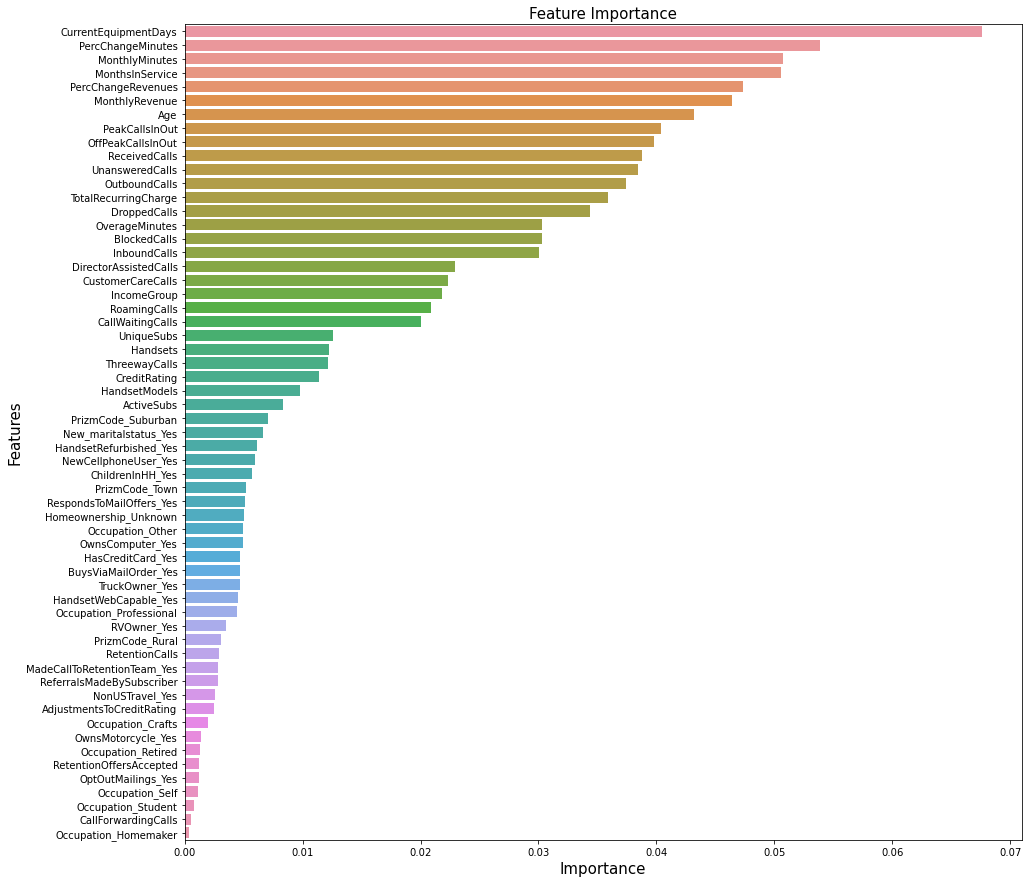

In [48]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': final_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.rcParams['figure.figsize']=[15,15]
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

### Least important features

In [46]:
x=important_features.iloc[50:,]
x

,Features,Importance
50,Occupation_Crafts,0.001961
45,OwnsMotorcycle_Yes,0.001382
54,Occupation_Retired,0.001333
27,RetentionOffersAccepted,0.001220
40,OptOutMailings_Yes,0.001213
55,Occupation_Self,0.001134
56,Occupation_Student,0.000763
18,CallForwardingCalls,0.000506
51,Occupation_Homemaker,0.000402


### Confusion matrix

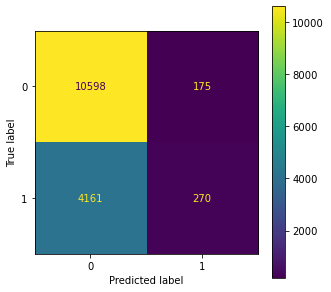

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rcParams['figure.figsize']=[5,5]
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)